# Bears

This notebook will use linear regression to predict the age of a bear based on it's features. These features include:
 * head length
 * head width,
 * neck (circumfrence?) 
 * length
 * chest (width?)
 * weight
 
The data used in this notebook can be found https://people.sc.fsu.edu/~jburkardt/datasets/triola/bears.csv 

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from linear_regression import LinearRegressionModel

Load the csv file and convert age to years

In [14]:
data = pd.read_csv('./data/bears.csv')
data['AGE'] /= 12.0
data.head()

,AGE,MONTH,SEX,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
0,1.583333,7,1,11.0,5.5,16.0,53.0,26.0,80
1,4.583333,7,1,16.5,9.0,28.0,67.5,45.0,344
2,6.750000,9,1,15.5,8.0,31.0,72.0,54.0,416
3,9.583333,7,1,17.0,10.0,31.5,72.0,49.0,348
4,8.666667,8,2,15.5,6.5,22.0,62.0,35.0,166


Explore the different pairs of features visually to see if we can spot linear relationships between them

[]

/Users/jeremy/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


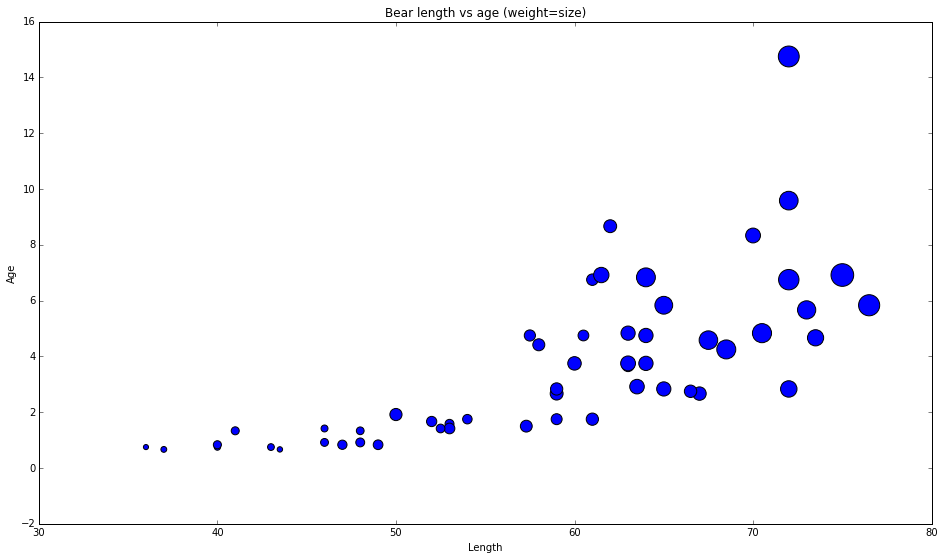

In [15]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data['LENGTH'], data['AGE'], s=data['WEIGHT'])
ax.set_title('Bear length vs age (weight=size)')
ax.set_xlabel('Length')
ax.set_ylabel('Age')
ax.plot()

Split the data training and test sets

In [16]:
train = data.sample(frac=0.7, random_state = 4)
test = data.drop(train.index)
test = test.sort('WEIGHT')
target = 'AGE'
features = ['HEADLEN', 'HEADWTH', 'NECK', 'LENGTH', 'CHEST', 'WEIGHT']

/Users/jeremy/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Create a linear regression model using the training data. Make a prediction with the test data and visualize the results.

[]

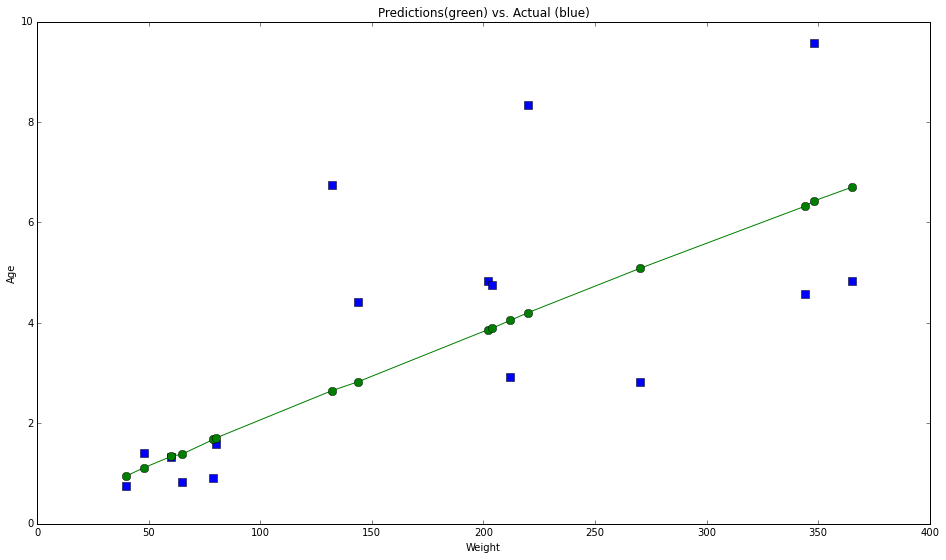

In [6]:
model = LinearRegressionModel()
model.eta = 4e-7
model.tolerance = 100
model.learn(train, features, target)

predictions = model.predict(test, features)
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(test['WEIGHT'], test['AGE'], 's', test['WEIGHT'], predictions, 'go-', markersize=8.0)
ax.set_title('Predictions(green) vs. Actual (blue)')
ax.set_ylabel('Age')
ax.set_xlabel('Weight')
ax.plot()

[]

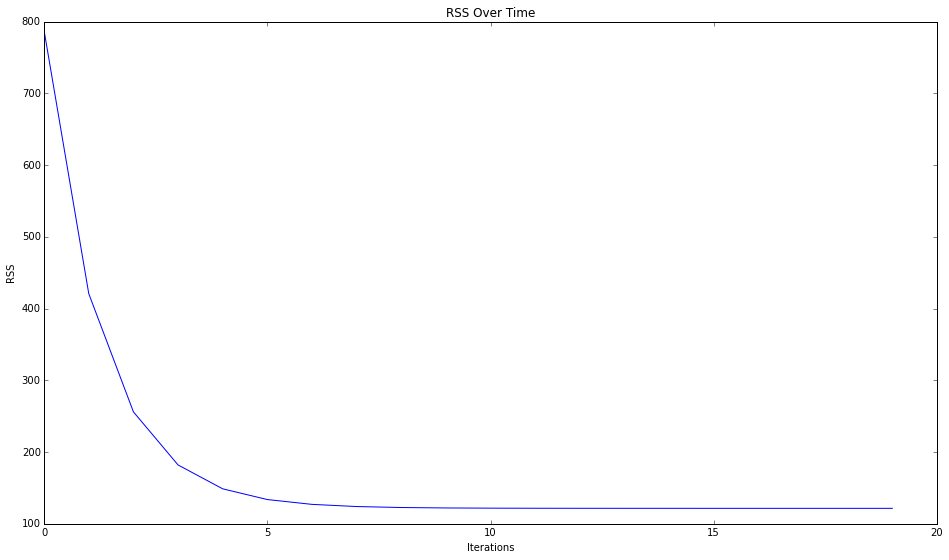

In [6]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(model.rss)
ax.set_title('RSS Over Time')
ax.set_ylabel('RSS')
ax.set_xlabel('Iterations')
ax.plot()

[]

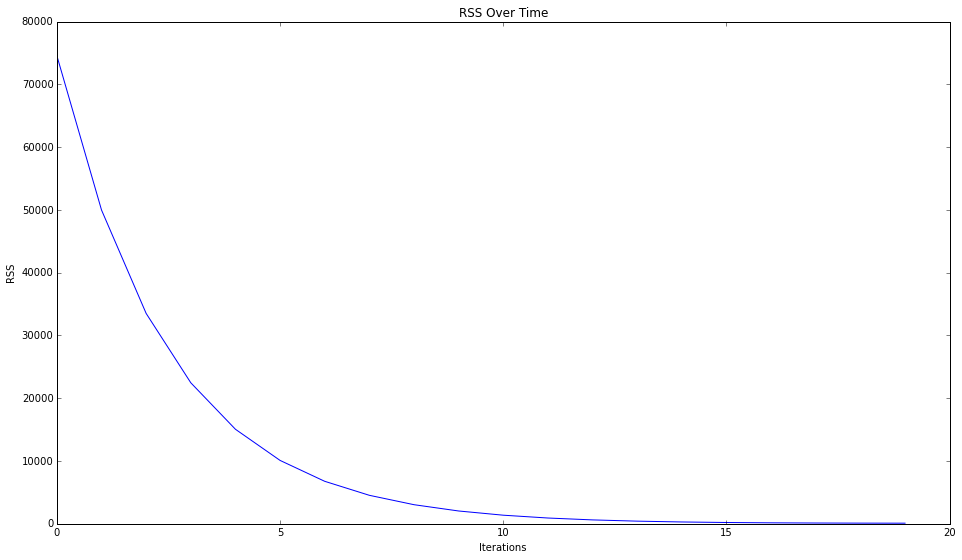

In [8]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(model.gradient_magnitudes)
ax.set_title('RSS Over Time')
ax.set_ylabel('RSS')
ax.set_xlabel('Iterations')
ax.plot()